# Resnet50

In [1]:
from keras.applications.resnet import ResNet50

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

2025-07-04 08:09:10.486012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751616550.738347      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751616550.812891      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = r"/kaggle/input/comsys/Comys_Hackathon5/Task_A/train"
test_path = r"/kaggle/input/comsys/Comys_Hackathon5/Task_A/val"

In [4]:
i_model = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

I0000 00:00:1751616578.219728      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751616578.220568      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
for layer in i_model.layers:
    layer.trainable = False

In [6]:
folders = glob(r'/kaggle/input/comsys/Comys_Hackathon5/Task_A/train/*')

In [7]:
x = Flatten()(i_model.output)
output = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=i_model.input, outputs=output)

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory(r"/kaggle/input/comsys/Comys_Hackathon5/Task_A/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1926 images belonging to 2 classes.


In [11]:
test_set = test_datagen.flow_from_directory(r"/kaggle/input/comsys/Comys_Hackathon5/Task_A/val",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 422 images belonging to 2 classes.


In [12]:
from sklearn.utils.class_weight import compute_class_weight
y_train = training_set.classes
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)


Class Weights: {0: 3.1782178217821784, 1: 0.5933456561922366}


In [13]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=200,
  validation_steps=130,
  class_weight=class_weights_dict

)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1751616633.400742      98 service.cc:148] XLA service 0x7f07cc04b9c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751616633.401808      98 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751616633.401832      98 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751616635.090488      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/200 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.6719 - loss: 3.7491 

I0000 00:00:1751616640.212219      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 61/200 ━━━━━━━━━━━━━━━━━━━━ 1:20 577ms/step - accuracy: 0.5203 - loss: 3.8506

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 ━━━━━━━━━━━━━━━━━━━━ 63s 226ms/step - accuracy: 0.5481 - loss: 2.7449 - val_accuracy: 0.4171 - val_loss: 1.5706
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 149ms/step - accuracy: 0.6592 - loss: 0.7887 - val_accuracy: 0.8270 - val_loss: 0.4394
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 143ms/step - accuracy: 0.6753 - loss: 0.8941 - val_accuracy: 0.5095 - val_loss: 1.1354
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 146ms/step - accuracy: 0.6701 - loss: 0.7760 - val_accuracy: 0.7962 - val_loss: 0.4407
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 142ms/step - accuracy: 0.6675 - loss: 0.8202 - val_accuracy: 0.4692 - val_loss: 1.6450
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 144ms/step - accuracy: 0.6572 - loss: 0.8424 - val_accuracy: 0.8152 - val_loss: 0.4582
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.7422 - loss: 0.5605 - val_accuracy: 0.7773 - val_loss: 0.4762
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 147ms/step - accuracy: 0.7178 - loss: 0.6222 - val

In [16]:
model.save("gender_classification.h5")

In [14]:
from sklearn.metrics import classification_report
import numpy as np

train_steps = training_set.samples // training_set.batch_size + 1
y_pred_probs = model.predict(training_set, steps=train_steps, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = training_set.classes

class_labels = list(training_set.class_indices.keys())

# Print classification report
print("\nClassification Report (Training Set):")
print(classification_report(y_true, y_pred, target_names=class_labels, digits=4))


61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 501ms/step

Classification Report (Training Set):
              precision    recall  f1-score   support

      female     0.1589    0.3036    0.2086       303
        male     0.8434    0.6999    0.7650      1623

    accuracy                         0.6376      1926
   macro avg     0.5011    0.5018    0.4868      1926
weighted avg     0.7357    0.6376    0.6775      1926



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


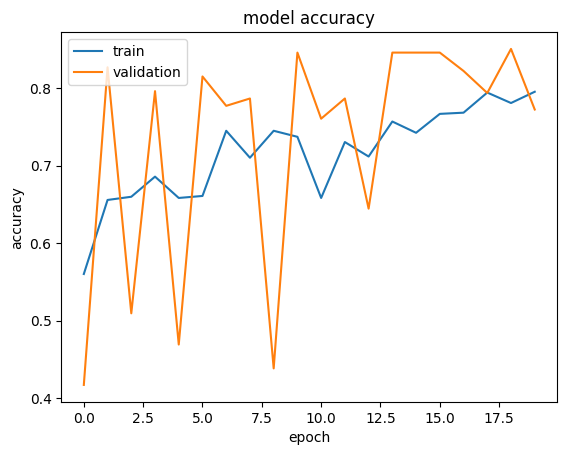

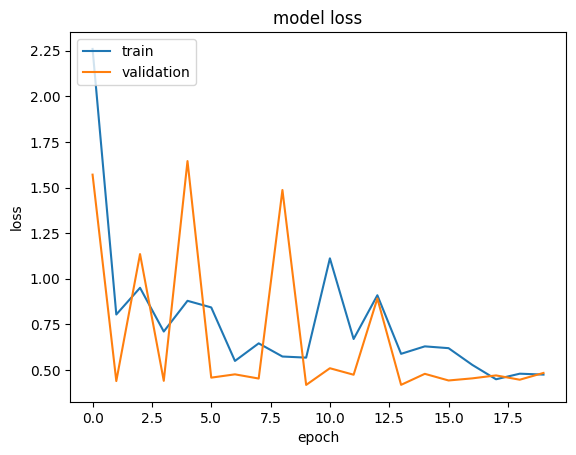

In [15]:
import matplotlib.pyplot as plt

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()